# Chapter 9: Infinite Series

### Section 9.7: Taylor Polynomials and Approximations

### Section Objectives:
##### Objective 1: Find polynomial approximations of elementary functions and compare them with the elementary functions
##### Objective 2: Find Taylor and Maclaurin polynomial approximations of elementary functions
##### Objective 3: Use the remainder of a Taylor polynomial

In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import sympy as sym
from sympy import lambdify

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

##### Objective 1: Find polynomial approximations of elementary functions and compare them with the elementary functions

##### Motivating Example

Consider the function $f(x) = e^x$

**(a)** Find the linear approximation of $f(x)$ at the point $(0,1)$

**(b)** Find the quadratic approximation of $f(x)$ at the point $(0, 1)$

**(c)** Find the cubic approximation of $f(x)$ at the point $(0, 1)$

##### Solution:

**(a)** Find the linear appriximation of $f(x) = e^x$ at the point $(0,1)$

* Finding the linear approximation is the same as finding the equation of the tangent line

* If we let $P(x) = ax + b$ then we require two conditions:
    * $P(0) = f(0)$ and $P'(0) = f'(0)$

* Employing the condition $P(0) = f(0)$ leads to

\begin{align}
    P(0) & = b \\
    f(0) & = e^0 = 1 \\
    P(0) = f(0) & \Rightarrow b = 1
\end{align}

* Employing $P'(0) = f'(0)$ leads to

\begin{align}
    P'(x) = a & \Rightarrow P'(0) = a \\
    f'(x) = e^x & \Rightarrow f'(0) = e^0 = 1 \\
    P'(0) = f'(0) & \Rightarrow a = 1
\end{align}

* Therefore, the linear approximation is $P(x) = x + 1$

**(b)** Find the quadratic approximation of $f(x) = e^x$ at the point $(0,1)$

* If we let $P(x) = ax^2 + bx + c$ then we require three condtions:

    * $P(0) = f(0)$, $P'(0) = f'(0)$, and $P''(0) = f''(0)$

* Employing $P(0) = f(0)$ leads to

\begin{align}
    P(0) & = c \\
    f(0) & = 1 \\
    P(0) = f(0) & \Rightarrow c = 1
\end{align}

* Employing $P'(0) = f'(0)$ leads to

\begin{align}
    P'(x) = 2ax + b & \Rightarrow P'(0) = b \\
    f'(x) = e^x & \Rightarrow f'(0) = 1 \\
    P'(0) = f'(0) & \Rightarrow b = 1
\end{align}

* Employing $P''(0) = f''(0))$ leads to

\begin{align}
    P''(x) = 2a & \Rightarrow P''(0) = 2a \\
    f''(x) = e^x & \Rightarrow f''(0) = 1 \\
    P''(0) = f''(0) & \Rightarrow 2a = 1 \Rightarrow a = \frac{1}{2}
\end{align}

* Therefore, the quadratic approximation is $P(x) = \cfrac{1}{2} x^2 + x + 1$

**(c)** Find the cubic approximation of $f(x) = e^x$ at the point $(0, 1)$

* If we let $P(x) = ax^3 + bx^2 + cx + d$ then we require three condtions:

    * $P(0) = f(0)$, $P'(0) = f'(0), P''(0) = f''(0)$, and $P'''(0) = f'''(0)$

* Employing $P(0) = f(0)$ leads to

\begin{align}
    P(0) & = d \\
    f(0) & = 1 \\
    P(0) = f(0) & \Rightarrow d = 1
\end{align}

* Employing $P'(0) = f'(0)$ leads to

\begin{align}
    P'(x) = 3ax^2 + 2bx + c & \Rightarrow P'(0) = c \\
    f'(x) = e^x & \Rightarrow f'(0) = 1 \\
    P'(0) = f'(0) & \Rightarrow c = 1
\end{align}

* Employing $P''(0) = f''(0))$ leads to

\begin{align}
    P''(x) = 6ax + 2b & \Rightarrow P''(0) = 2b \\
    f''(x) = e^x & \Rightarrow f''(0) = 1 \\
    P''(0) = f''(0) & \Rightarrow 2b = 1 \Rightarrow b = \frac{1}{2}
\end{align}

* Employing $P'''(0) = f'''(0)$ leads to

\begin{align}
    P'''(x) = 6a & \Rightarrow P''(0) = 6a \\
    f'''(x) = e^x & \Rightarrow f'''(0) = 1 \\
    P'''(0) = f'''(0) & \Rightarrow 6a = 1 \Rightarrow a = \frac{1}{6}
\end{align}

* Therefore, the cubic approximation is $P(x) = \cfrac{1}{6} x^3 + \cfrac{1}{2} x^2 + x + 1$

Let's take a look at these approximations graphically:

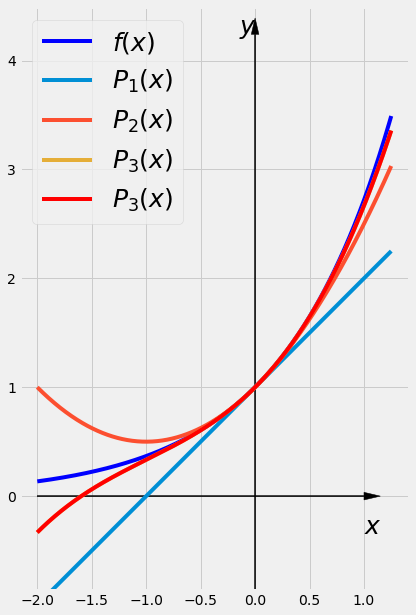

In [2]:
def f(x):
    return sym.exp(x)

def taylor_poly(x, c, n):
    taylor_sum = f(x).evalf(subs = {x: c})
    for i in range(n):
        taylor_sum += 1 / sym.factorial(i + 1) * (x - c)**(i + 1) * sym.diff(f(x), x, i + 1).evalf(subs = {x: c})
    return taylor_sum

min_x = -2
max_x = 1.25
x_range = max_x - min_x

x = sym.Symbol('x')
t = np.linspace(min_x, max_x, 500)
y_func = lambdify(x, f(x))
y_taylor = lambdify(x, taylor_poly(x, c=0, n=1))

##### begin figure
fig, ax = plt.subplots(figsize = (20, 10))

min_y = min(y_func(t)) - 1
max_y = max(y_func(t)) + 1
y_range = max_y - min_y

##### form axes
ax.arrow(0, min_y, 0, y_range - 0.25, width=0.01, color='k',
         clip_on=False, head_width=0.07, head_length=0.15)
ax.arrow(min_x, 0, x_range - 0.25, 0, width=0.01, color='k',
         clip_on=False, head_width=0.07, head_length=0.15)
ax.annotate('$y$', (-0.15, max_y - 0.25), fontsize = 25)
ax.annotate('$x$', (max_x - 0.25, -0.35), fontsize = 25)

##### plot P(x) and f(x)
ax.plot(t, y_func(t), color = 'blue', label = '$f(x)$')
k = 3
for ii in range(1, k + 1):
    y_taylor = lambdify(x, taylor_poly(x, c=0, n=ii))
    ax.plot(t, y_taylor(t), 
            label = '$P_{}(x)$'.format({ii}))

##### single polynomial plot
y_taylor = lambdify(x, taylor_poly(x, c=0, n=3))
ax.plot(t, y_taylor(t), color = 'red',
            label = '$P_{}(x)$'.format({ii}))

##### set plotting parameters
ax.set_ylim(min_y, max_y)
ax.legend(fontsize=25)
ax.set_aspect('equal')

##### Objective 2: Find Taylor and Maclaurin polynomial approximations of elementary functions

##### General Form of Taylor Polynomial Approximations

* For a function $f(x)$ with $n$ derivatives at $x = c$ the $n$th Taylor polynomial centered at $x = c$ is defined as

\begin{align}
    P_n(x) & = f(c) + (x - c) \cdot f'(c) + \frac{(x - c)^2}{2!} \cdot f''(c) + \cdots + \frac{(x - c)}{n!} \cdot f^{(n)}(c) \\
    & \text{or in summation notation} \\
    P_n(x) & = \sum_{k = 0}^n \frac{(x - c)^k}{k!} \cdot f^{(k)}(c)
\end{align}

* For a function $f(x)$ with $n$ derivatives at $x = 0$ the $n$th Maclaurin polynomial is

\begin{align}
    P_n(x) & = f(0) + x \cdot f'(0) + \frac{x^2}{2!} \cdot f''(0) + \cdots + \frac{x}{n!} \cdot f^{(n)}(0) \\
    & \text{or in summation notation} \\
    P_n(x) & = \sum_{k = 0}^n \frac{x^k}{k!} \cdot f^{(k)}(0)
\end{align}

##### Example 1

Find the Taylor polynomial $P_4(x)$ centered at $c = 1$ for the function $f(x) = \ln{x}$

##### Solution:

* We need to apply the formula with $n = 4$ and $c = 1$, but before we do we need to know $f(1), f'(1), f''(1), f'''(1),$ and $f^{(4)}(1)$:

\begin{align}
    f(1) & = \ln{1} = 0 \\
    f'(x) = \frac{1}{x} & \Rightarrow f'(1) = 1 \\
    f''(x) = \frac{d}{dx}\left( x^{-1} \right) = - \frac{1}{x^2} & \Rightarrow f''(1) = -1 \\
    f'''(x) = \frac{d}{dx}\left( -x^{-2} \right) = \frac{2}{x^3} & \Rightarrow f'''(1) = 2 \\
    f^{(4)}(x) = \frac{d}{dx}\left( 2x^{-3} \right) = - \frac{6}{x^4} & \Rightarrow f^{(4)}(1) = -6
\end{align}

* Now plug into the summation formula:

\begin{align}
    P_4(x) & = \frac{1}{0!} \cdot f(1) + \frac{x - 1}{1!} \cdot f'(1) + \frac{(x - 1)^2}{2!} \cdot f''(1) \\
    & \qquad \qquad + \frac{(x - 1)^3}{3!} \cdot f'''(1) + \frac{(x-1)^4}{4!} \cdot f^{(4)}(1) \\
    \Rightarrow P_4(x) & = 1 \cdot 0 + (x - 1) \cdot 1 + \frac{(x - 1)^2}{2} \cdot -1 + \frac{(x - 1)^3}{6} \cdot 2 + \frac{(x-1)^4}{24} \cdot -6 \\
    \Rightarrow P_4(x) & = (x - 1) - \frac{(x - 1)^2}{2} + \frac{(x - 1)^3}{3} - \frac{(x-1)^4}{4}
\end{align}

* Graphical representation of our polynomial approximation:

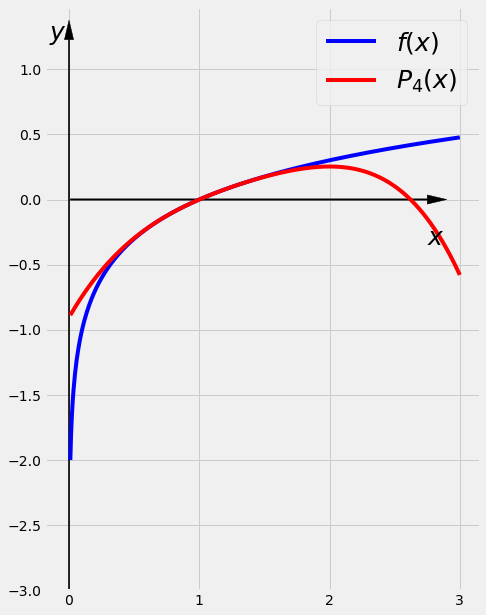

In [3]:
def f(x):
    return sym.log(x, 10)

min_x = 0.01
max_x = 3
x_range = max_x - min_x

x = sym.Symbol('x')
t = np.linspace(min_x, max_x, 500)
y_func = lambdify(x, f(x))
y_taylor = lambdify(x, taylor_poly(x, c=1, n=1))

##### begin figure
fig, ax = plt.subplots(figsize = (20, 10))

min_y = min(y_func(t)) - 1
max_y = max(y_func(t)) + 1
y_range = max_y - min_y

##### form axes
ax.arrow(0, min_y, 0, y_range - 0.25, width=0.01, color='k',
         clip_on=False, head_width=0.07, head_length=0.15)
ax.arrow(min_x, 0, x_range - 0.25, 0, width=0.01, color='k',
         clip_on=False, head_width=0.07, head_length=0.15)
ax.annotate('$y$', (-0.15, max_y - 0.25), fontsize = 25)
ax.annotate('$x$', (max_x - 0.25, -0.35), fontsize = 25)

##### plot P(x) and f(x)
ax.plot(t, y_func(t), color = 'blue', label = '$f(x)$')
k = 4
y_taylor = lambdify(x, taylor_poly(x, c=1, n=k))
ax.plot(t, y_taylor(t), color = 'red', 
        label = '$P_{}(x)$'.format({k}))

##### set plotting parameters
ax.set_ylim(min_y, max_y)
ax.set_xticks(np.arange(max_x + 1))
ax.legend(fontsize=25)
ax.set_aspect('equal')

##### Example 2

Find the Maclaurin polynomial $P_6(x)$ for the function $f(x) = \cos{x}$.

##### Solution:

* Since we are finding the Maclaurin polynomial, by definition, $c = 0$

* We find the function and derivative values:

\begin{align}
    f(0) & = 1 \\
    f'(x) = - \sin{x} & \Rightarrow f'(0) = 0 \\
    f''(x) = - \cos{x} & \Rightarrow f''(0) = -1 \\
    f'''(x) = \sin{x} & \Rightarrow f'''(0) = 0 \\
    f^{(4)}(x) = \cos{x} & \Rightarrow f^{(4)}(0) = 1 \\
    f^{(5)}(x) = - \sin{x} & \Rightarrow f^{(5)}(0) = 0 \\
    f^{(6)}(x) = - \cos{x} & \Rightarrow f^{(6)}(0) -1
\end{align}

* Applying the formula:

\begin{align}
    P_6(x) & = f(0) + x \cdot f'(0) + \frac{x^2}{2!} \cdot f''(0) + \frac{x^3}{3!} \cdot f'''(0) \\
    & \qquad \qquad + \frac{x^4}{4!} \cdot f^{(4)}(0) + \frac{x^5}{5!} \cdot f^{(5)}(0) + \frac{x^6}{6!} \cdot f^{(6)}(0) \\
    \Rightarrow P_6(x) & = 1 + x \cdot 0 + \frac{x^2}{2} \cdot -1 + \frac{x^3}{6} \cdot 0 + \frac{x^4}{24} \cdot 1 + \frac{x^5}{120} \cdot 0 + \frac{x^6}{720} \cdot -1 \\
    \Rightarrow P_6(x) & = 1 - \frac{x^2}{2} + \frac{x^4}{24} - \frac{x^6}{720}
\end{align}

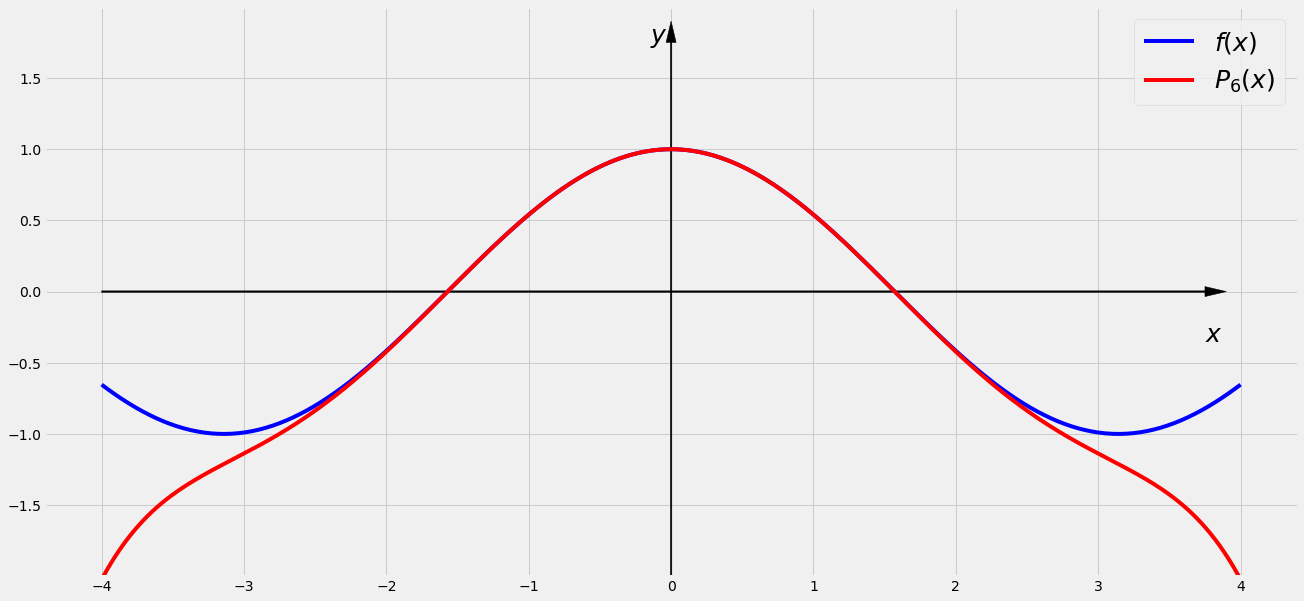

In [4]:
def f(x):
    return sym.cos(x)

min_x = -4
max_x = 4
x_range = max_x - min_x

x = sym.Symbol('x')
t = np.linspace(min_x, max_x, 500)
y_func = lambdify(x, f(x))
y_taylor = lambdify(x, taylor_poly(x, c=0, n=1))

##### begin figure
fig, ax = plt.subplots(figsize = (20, 10))

min_y = min(y_func(t)) - 1
max_y = max(y_func(t)) + 1
y_range = max_y - min_y

##### form axes
ax.arrow(0, min_y, 0, y_range - 0.25, width=0.01, color='k',
         clip_on=False, head_width=0.07, head_length=0.15)
ax.arrow(min_x, 0, x_range - 0.25, 0, width=0.01, color='k',
         clip_on=False, head_width=0.07, head_length=0.15)
ax.annotate('$y$', (-0.15, max_y - 0.25), fontsize = 25)
ax.annotate('$x$', (max_x - 0.25, -0.35), fontsize = 25)

##### plot P(x) and f(x)
ax.plot(t, y_func(t), color = 'blue', label = '$f(x)$')
k = 6
y_taylor = lambdify(x, taylor_poly(x, c=0, n=k))
ax.plot(t, y_taylor(t), color = 'red', 
        label = '$P_{}(x)$'.format({k}))

##### set plotting parameters
ax.set_ylim(min_y, max_y)
# ax.set_xticks(np.arange(max_x + 1))
ax.legend(fontsize=25)
ax.set_aspect('equal')

##### Objective 3: Use the remainder of a Taylor polynomial

##### Taylor's Remainder Theorem

* Since we are approximating the function $f(x)$ by a polynomial function $P_n(x)$ we'll always have some error between the exact value of $f(x)$ and the approximate value of $P(x)$

* We could represent this fact with the equation

\begin{align}
    \underbrace{f(x)}_{\text{Exact value}} & = \underbrace{P_n(x)}_{\text{Approximate value}} + \underbrace{R_n(x)}_{\text{Remainder}}
\end{align}

* Solving the above equation for $R_n(x)$:

\begin{align}
    R_n(x) & = f(x) - P_n(x)
\end{align}

* Taking the absolute value of this quantity is called the **error:**

\begin{align}
    \text{Error} & = |R_n(x)| = |f(x) - P_n(x)|
\end{align}

* The next theorem provides a way to determine $R_n(x)$

##### Theorem 9.19: Taylor's Theorem

If a function $f$ is differentiable through order $n + 1$ in an interval $I$ containing $c$, then, for each $x$ in $I$, there exists $z$ between $x$ and $c$ such that

\begin{align}
    f(x) & = f(c) + (x - c) \cdot f'(c) + \frac{(x - c)^2}{2!} \cdot f''(c) + \cdots + \frac{(x - c)^n}{n!} \cdot f^{(n)}(c) + R_n(x)
\end{align}

where

\begin{align}
    R_n(x) & = \frac{f^{(n + 1)}(z)}{(n + 1)!} \cdot (x - c)^{n + 1}
\end{align}

##### Example 3

Use Taylor's Theorem to approximate $\sin(0.1)$ by $P_3(0.1)$ using the third Maclaurin polynomial and determine the accuracy of the approximation.

##### Solution:

* We need to use $c = 0$ since we are finding the third *Maclaurin* polynomial

    * The phrase "Maclaurin polynomial" will *always* translate to $c = 0$
    
    * The phrase "Taylor polynomial" *must* be accompanied with a specified value for $c$
    
        * <em><b>A Maclaurin polynomial is a Taylor polynomial with $c = 0$</b></em>
        
        * This means that a Maclaurin polynomial is a *specific type* of Taylor polynomial and has a special name due to it's very common use

* Finding $P_3(x)$ with $c = 0$ we find the appropriate function values:

\begin{align}
    f(0) & = 0 \\
    f'(x) = \cos{x} & \Rightarrow f'(0) = 1 \\
    f''(x) = - \sin{x} & \Rightarrow f''(0) = 0 \\
    f'''(x) = - \cos{x} & \Rightarrow f'''(0) = -1
\end{align}

* Now apply the formula:

\begin{align}
    P_3(x) & = f(0) + x \cdot f'(0) + \frac{x^2}{2!} \cdot f''(0) + \frac{x^3}{3!} \cdot f'''(0) \\
    \Rightarrow P_3(x) & = 0 + x \cdot 1 + \frac{x^2}{2} \cdot 0 + \frac{x^3}{6} \cdot -1 \\
    \Rightarrow P_3(x) & = x - \frac{x^3}{6}
\end{align}

* Now we approximate $\sin{(0.1)}$ by calculating $P_3(0.1)$:

\begin{align}
    P_3(0.1) & = 0.1 - \frac{(0.1)^3}{6} \\
    & \approx 0.1 - 0.000167 \\
    & = 0.099833
\end{align}

* Therefore, $\sin{(0.1)} \approx 0.099833$

* Finally, we need to determine the accuracy of this approximation so we need to apply Taylor's Theorem

* By Taylor's Theorem, for some $z$ between $c = 0$ and $x = 0.1$, we have

\begin{align}
    R_3(0.1) & = f(0.1) - P_3(0.1) = \frac{f^{(4)}(z)}{4!} \cdot (0.1)^4 \\
    \Rightarrow |R_3(0.1)| & = |f(0.1) - P_3(0.1)| = \frac{|f^{(4)}(z)|}{24} \cdot (0.1)^4 \\
\end{align}

* Since $f^{(4)}(x) = \sin{x}$ and $-1 \leq \sin{x} \leq 1$, then $|f^{(4)}(x)| = |\sin{x}| \leq 1$ (most especially since $0 \leq z \leq 0.1$)

* Therefore, we can say with certainty that

\begin{align}
    |R_3(0.1)| & \leq \frac{1}{24} \cdot (0.1)^4 \\
    & \approx 4 \times 10^{-6} \\
    & = 0.000004
\end{align}

* So we have

\begin{align}
    0.099833 - 0.000004 & \leq \sin{(0.1)} \leq 0.099833 + 0.000004 \\
    0.099829 & \leq \sin{(0.1)} \leq 0.099837
\end{align}

* Comparing to the value of $\sin{(0.1)}$ on a calculator:

\begin{align}
    \sin{(0.1)} & \approx 0.0998334166
\end{align}

##### End of Section